## 数学函数

**将数组a中大于30的值替换为30，小于10的值替换为10。**

- `a = np.random.uniform(1, 50, 20)`

【知识点：数学函数、搜索】
- 如何将大于给定值的所有值替换为给定的截止值？

In [5]:
import numpy as np

np.set_printoptions(precision=2)
np.random.seed(100)
a = np.random.uniform(1, 50, 20)
print(a)
# [27.63 14.64 21.8  42.39  1.23  6.96 33.87 41.47  7.7  29.18 44.67 11.25
#  10.08  6.31 11.77 48.95 40.77  9.43 41.   14.43]

# 方法1
b = np.clip(a, a_min=10, a_max=30)
print(b)
# [27.63 14.64 21.8  30.   10.   10.   30.   30.   10.   29.18 30.   11.25
#  10.08 10.   11.77 30.   30.   10.   30.   14.43]

# 方法2
b = np.where(a < 10, 10, a)
b = np.where(b > 30, 30, b)
print(b)
# [27.63 14.64 21.8  30.   10.   10.   30.   30.   10.   29.18 30.   11.25
#  10.08 10.   11.77 30.   30.   10.   30.   14.43]

[27.63 14.64 21.8  42.39  1.23  6.96 33.87 41.47  7.7  29.18 44.67 11.25
 10.08  6.31 11.77 48.95 40.77  9.43 41.   14.43]
[27.63 14.64 21.8  30.   10.   10.   30.   30.   10.   29.18 30.   11.25
 10.08 10.   11.77 30.   30.   10.   30.   14.43]
[27.63 14.64 21.8  30.   10.   10.   30.   30.   10.   29.18 30.   11.25
 10.08 10.   11.77 30.   30.   10.   30.   14.43]



**找到一个一维数字数组a中的所有峰值。峰顶是两边被较小数值包围的点。**

- `a = np.array([1, 3, 7, 1, 2, 6, 0, 1])`

【知识点：数学函数、搜索】
- 如何在一维数组中找到所有的局部极大值（或峰值）？

In [7]:
import numpy as np

a = np.array([1, 3, 7, 1, 2, 6, 0, 1])
b1 = np.diff(a)
b2 = np.sign(b1)
b3 = np.diff(b2)

print(b1)  # [ 2  4 -6  1  4 -6  1]
print(b2)  # [ 1  1 -1  1  1 -1  1]
print(b3)  # [ 0 -2  2  0 -2  2]
index = np.where(np.equal(b3, -2))[0] + 1
print(index) # [2 5]

[ 2  4 -6  1  4 -6  1]
[ 1  1 -1  1  1 -1  1]
[ 0 -2  2  0 -2  2]
[2 5]


**对于给定的一维数组，计算窗口大小为3的移动平均值。**

- `z = np.random.randint(10, size=10)`

【知识点：数学函数】
- 如何计算numpy数组的移动平均值？

In [8]:
import numpy as np

np.random.seed(100)
z = np.random.randint(10, size=10)
print(z)
# [8 8 3 7 7 0 4 2 5 2]

def MovingAverage(arr, n=3):
    a = np.cumsum(arr)
    a[n:] = a[n:] - a[:-n]
    return a[n - 1:] / n


r = MovingAverage(z, 3)
print(np.around(r, 2))
# [6.33 6.   5.67 4.67 3.67 2.   3.67 3.  ]

[8 8 3 7 7 0 4 2 5 2]
[6.33 6.   5.67 4.67 3.67 2.   3.67 3.  ]


**对一个5x5的随机矩阵做归一化**

【知识点：数学函数】
- (提示: (x - min) / (max - min))

In [2]:
Z = np.random.random((5,5))
Zmax, Zmin = Z.max(), Z.min()
Z = (Z - Zmin)/(Zmax - Zmin)
print(Z)

[[0.65852707 0.23160203 0.9700425  0.43393441 0.36950354]
 [0.58585632 0.01877358 0.         0.27782335 0.89654906]
 [0.71307774 0.32030221 0.55187887 0.01411576 0.38903753]
 [0.05702349 0.40824762 0.23277188 0.74335934 0.72125366]
 [0.59816442 0.98727663 1.         0.86466287 0.42760849]]


**用五种不同的方法去提取一个随机数组的整数部分**

【知识点：数学函数】

- (提示: %, np.floor, np.ceil, astype, np.trunc)

In [3]:
Z = np.random.uniform(0,10,10)

print (Z - Z%1)
print (np.floor(Z))
print (np.ceil(Z)-1)
print (Z.astype(int))
print (np.trunc(Z))

[8. 5. 5. 1. 2. 7. 0. 1. 5. 9.]
[8. 5. 5. 1. 2. 7. 0. 1. 5. 9.]
[8. 5. 5. 1. 2. 7. 0. 1. 5. 9.]
[8 5 5 1 2 7 0 1 5 9]
[8. 5. 5. 1. 2. 7. 0. 1. 5. 9.]


**考虑一维数组Z，构建一个二维数组，其第一行为（Z [0]，Z [1]，Z [2]），随后的每一行都移位1（最后一行应为（Z [ -3]，Z [-2]，Z [-1]）**

【知识点：数学函数】

- （提示np.lib.stride_tricks）

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]--------> 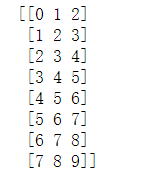     

In [8]:
np.arange(10).itemsize

4

In [7]:
from numpy.lib import stride_tricks
def rolling(a, window):
    shape = (a.size - window + 1, window)
    strides = (a.itemsize, a.itemsize)
    return stride_tricks.as_strided(a, shape=shape, strides=strides)
Z = rolling(np.arange(10), 3)
print (Z)

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]
 [6 7 8]
 [7 8 9]]


**考虑两组点集P0和P1去描述一组线(二维)和一个点p,如何计算点p到每一条线 i (P0[i],P1[i])的距离？**

【知识点：数学函数】
- 提示 设P(x0,y0)，直线方程为：Ax+By+C=0
则P到直线的距离为:d=|Ax0+By0+C|/√(A²+B²)


In [50]:
import numpy as np
def distance(P0,P1,p):
    A=-1/(P1[:,0]-P0[:,0])
    B=1/(P1[:,1]-P0[:,1])
    C=P0[:,0]/(P1[:,0]-P0[:,0])-P0[:,1]/(P1[:,1]-P0[:,1])
    return np.abs(A*p[:,0]+B*p[:,1]+C)/np.sqrt(A**2+B**2)

In [51]:
P0 = np.random.uniform(-10,10,(10,2))
P1 = np.random.uniform(-10,10,(10,2))
p  = np.random.uniform(-10,10,( 1,2))

print (distance(P0, P1, p))

[ 2.41120585  7.05924485  5.94906338  3.89096895  7.68364539 14.01851392
  4.28148124  2.29582076  6.19155339 15.55087594]


## 逻辑函数

**获取a和b元素匹配的位置。**
- `a = np.array([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])`
- `b = np.array([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])`

【知识点：逻辑函数】
- 如何得到两个数组元素匹配的位置？

In [2]:
import numpy as np

a = np.array([1, 2, 3, 2, 3, 4, 3, 4, 5, 6])
b = np.array([7, 2, 10, 2, 7, 4, 9, 4, 9, 8])
mask = np.equal(a, b)

# 方法1
x = np.where(mask)
print(x)  # (array([1, 3, 5, 7], dtype=int64),)

# 方法2
x = np.nonzero(mask)
print(x)  # (array([1, 3, 5, 7], dtype=int64),)

(array([1, 3, 5, 7], dtype=int64),)
(array([1, 3, 5, 7], dtype=int64),)


**获取5到10 之间的所有元素。**
- `a = np.array([2, 6, 1, 9, 10, 3, 27])`

【知识点：逻辑函数】
- 如何从numpy数组中提取给定范围内的所有元素？

In [4]:
import numpy as np

a = np.array([2, 6, 1, 9, 10, 3, 27])
mask = np.logical_and(np.greater_equal(a, 5), np.less_equal(a, 10))

# 方法1
x = np.where(mask)
print(a[x])  # [ 6  9 10]

# 方法2
x = np.nonzero(mask)
print(a[x])  # [ 6  9 10]

# 方法3
x = a[np.logical_and(a >= 5, a <= 10)]
print(x)  # [ 6  9 10]

[ 6  9 10]
[ 6  9 10]
[ 6  9 10]


**对于两个随机数组A和B,检查他们是否相等**

【知识点：逻辑函数】

- (提示: np.allclose, np.array_equal)

In [4]:
A = np.random.randint(0,2,5)
B = np.random.randint(0,2,5)

In [5]:

# Assuming identical shape of the arrays and a tolerance for the comparison of values
equal = np.allclose(A,B)
print(equal)

False


**何对布尔值取反，或者原位(in-place)改变浮点数的符号(sign)？**

【知识点：逻辑函数】
- (提示: np.logical_not, np.negative)

In [13]:
Z = np.array([0,1])
print(Z)
np.logical_not(Z, out=Z)
# Z = np.random.uniform(-1.0,1.0,100)

# np.negative(Z, out=Z)

[0 1]


array([1, 0])

In [14]:
Z = np.array([0.2,1.15])
print(Z)
np.negative(Z, out=Z)

[0.2  1.15]


array([-0.2 , -1.15])